In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from scipy.stats import kstest, norm, chi2_contingency

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)

In [3]:
# Import baobab data 
csv_name = "Baobab Data - Baobabs"
bab = pd.read_csv(f"csvs/{csv_name}.csv")

In [4]:
def statistics(df, column1, column2):
    df[f'Average {column2}'] = df.groupby([column1])[column2].transform('mean')
    counts = df.groupby(df[column1], as_index=False).size() 
    df = df.groupby([column1, f'Average {column2}'], as_index=False).std().rename(columns={column2: f"{column2} Standard Deviation"})
    df = pd.concat([df, counts['size']], axis=1).rename(columns={"size": "Counts"})
    return df

In [5]:
# Perform the Chi-Square Test of Independence
def chi_square_independence(df, column1, column2):
    contingency_table = pd.crosstab(df[column1], df[column2])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    return p_value

## 1. Is there a relationship between the bark stripping and the bark patterns? (This would tell us whether stripping bark from a tree makes it more susceptible to the bark pattern.) You could investigate presence/absence as well as the amount of bark stripping/bark patterns on a tree.

### Bark Stripping vs Bark Patterns

- A correlation coefficient of approximately -0.0218 indicates little to no correlation between the amount of bark stripping and the amount of bark pattern.  
- As seen by the graph, the linear regression is almost perfectly horizontal, indicating a weak relationship between bark stripping and bark pattern. 
- Regardless of the factor of bark stripping, there are many more cases of there being no bark pattern than compared to when there is bark patetrn. There is a marary factor of zero 160 times out of a total count of 265.
- The chi-square p-value (0.1490) between bark stripping factor and marary factor is greater than 0.05, suggesting that there is no significant association between the amount of bark stripping and amount of bark pattern. 

In [504]:
bab1a = bab.loc[:, ["Bark stripping factor", "Marary factor"]].dropna() # drop nan b/c not able to tell
r = bab['Bark stripping factor'].corr(bab['Marary factor'])
chi_square_pvalue = chi_square_independence(bab1a, "Bark stripping factor", "Marary factor")

Chi-Square p-value = 0.1489673592381665
r = -0.02176736525197237


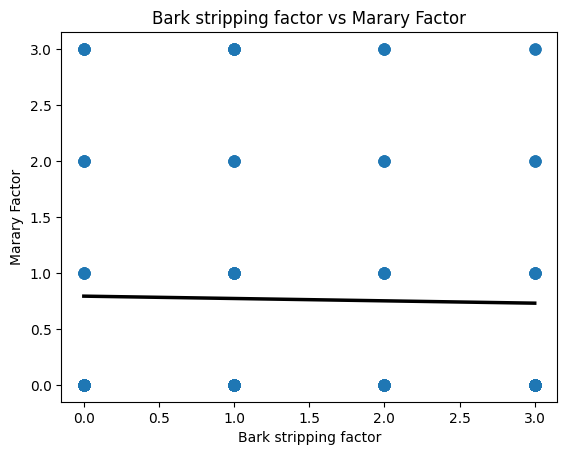

In [505]:
# Plot Bark Stripping Factor vs Marary Factor 
plt.scatter(bab1a["Bark stripping factor"], bab1a["Marary factor"], s=60, alpha=0.7)
plt.title(label="Bark stripping factor vs Marary Factor")
plt.xlabel(xlabel="Bark stripping factor")
plt.ylabel(ylabel="Marary Factor")

# Fit linear regression via least squares with numpy.polyfit
m, b = np.polyfit(bab1a["Bark stripping factor"], bab1a["Marary factor"], deg=1)
xseq = np.linspace(0, 3)
plt.plot(xseq, b + m * xseq, color="k", lw=2.5)

print(f"Chi-Square p-value = {chi_square_pvalue}")
print(f"r = {r}")

In [506]:
counts = bab1a.groupby(bab1a.columns.tolist(), as_index=False).size()
counts = counts.rename(columns={"size":"Count"}).sort_values(by=["Count"], ascending=False)
counts

,Bark stripping factor,Marary factor,Count
0,0.0,0.0,60
4,1.0,0.0,40
12,3.0,0.0,40
8,2.0,0.0,20
5,1.0,1.0,16
7,1.0,3.0,14
3,0.0,3.0,11
9,2.0,1.0,10
13,3.0,1.0,9
1,0.0,1.0,8


### Presence of bark stripping/bark patterns

The average factor of bark pattern is greater when bark stripping is present (0.827027) as compared to when bark stripping is absent (0.655172), with a roughly equal standard deviation in both cases, though both averages remain between zero and little pattern. This indicates that though more bark pattern may be associated with bark stripping, the difference is minimal and there is likely no relationship between the two.

It is important to note that the number of baobabs sampled that showed bark stripping (185) is much greater than those that did not show bark stripping (87), so proceed with caution. 

When conducting a sensitivity test with the Bark stripping "Y?", there was little noticeable change, with the Marary factor standard deviation of when the Bark stripping "Y?" are treated as "N" only slightly increasing over that of the Bark stripping "Y". This change can likely be attributed the differences in the counts, as there are less samples with Bark stripping "N", meaning the Marary factor average and standard deviation are more susceptible to greater change. 

Regardless of the sensitivity test, the chi-square p-value between the presence of bark stripping and marary factor is greater than 0.05, suggesting that there is no significant association between the presence of bark stripping and bark pattern. 

When random samples of equal counts were taken for baobabs with a bark stripping presence and absence, baobabs with a presence of bark stripping has a greater marary factor on average than that for the absence of bark stripping

In [521]:
bab1b = bab.loc[:, ["Bark stripping (Y/N)", "Marary factor"]].dropna()
bab1b = bab1b[bab1b['Bark stripping (Y/N)'] != 'Y?']
print(f"Chi-Square p-value = {chi_square_independence(bab1b, "Bark stripping (Y/N)", "Marary factor")}")
bab1b = bab1b.groupby('Bark stripping (Y/N)', group_keys=False).sample(n=87).reset_index(drop=True)
statistics(bab1b, "Bark stripping (Y/N)", "Marary factor")

Chi-Square p-value = 0.14658278444550046


,Bark stripping (Y/N),Average Marary factor,Marary factor Standard Deviation,Counts
0,N,0.655172,1.087215,87
1,Y,0.862069,1.153079,87


In [518]:
bab1b = bab.loc[:, ["Bark stripping (Y/N)", "Marary factor"]].dropna().replace('Y?', 'Y')
print(f"Chi-Square p-value = {chi_square_independence(bab1b, "Bark stripping (Y/N)", "Marary factor")}")
statistics(bab1b, "Bark stripping (Y/N)", "Marary factor")

Chi-Square p-value = 0.19181819481833598


,Bark stripping (Y/N),Average Marary factor,Marary factor Standard Deviation,Counts
0,N,0.655172,1.087215,87
1,Y,0.830769,1.115531,195


In [519]:
bab1b = bab.loc[:, ["Bark stripping (Y/N)", "Marary factor"]].dropna().replace('Y?', 'N')
print(f"Chi-Square p-value = {chi_square_independence(bab1b, "Bark stripping (Y/N)", "Marary factor")}")
statistics(bab1b, "Bark stripping (Y/N)", "Marary factor")

Chi-Square p-value = 0.07467234159560909


,Bark stripping (Y/N),Average Marary factor,Marary factor Standard Deviation,Counts
0,N,0.680412,1.123113,97
1,Y,0.827027,1.099567,185


## 2. Do larger trees (either by circumference or height) tend to have more of the bark pattern?

- Based on the linear regression line for Height vs Marary Factor, baobab height appears to have no affect on the amount of bark pattern.
- A correlation coefficient of approximately -0.0035540228930042586 indicates little to no correlation between the height and the amount of bark pattern.  
- Based on the linear regression line for Circumference vs Marary Factor, baobabs with a greater circumference tend to display more of the bark pattern.
- A correlation coefficient of approximately 0.36094714170723696 indicates a moderate positive correlation between the circumference and the amount of bark pattern.

In [623]:
bab2 = bab.loc[:, ["Height (m)", "Circumference of trunk (m)", "Marary factor"]].dropna().sort_values(by=["Marary factor"], ascending=True)
bab2_height = bab.loc[:, ["Height (m)", "Marary factor"]].dropna().sort_values(by=["Height (m)"], ascending=True).rename(columns={"Height (m)": "Baobab Height (m)"})
bab2_height = bab2_height.groupby('Marary factor', group_keys=False).sample(n=27).reset_index(drop=True)
bab2_circum = bab.loc[:, ["Circumference of trunk (m)", "Marary factor"]].dropna().sort_values(by=["Circumference of trunk (m)"], ascending=True).rename(columns={"Circumference of trunk (m)": "Baobab Circumference (m)"})
bab2_circum = bab2_circum.groupby('Marary factor', group_keys=False).sample(n=27).reset_index(drop=True)

r = bab['Height (m)'].corr(bab['Marary factor'])
r1 = bab['Circumference of trunk (m)'].corr(bab['Marary factor'])

In [616]:
statistics(bab2_height, "Marary factor", "Baobab Height (m)")

,Marary factor,Average Baobab Height (m),Baobab Height (m) Standard Deviation,Counts
0,0.0,5.433704,1.805392,27
1,1.0,5.559630,1.095292,27
2,2.0,6.007778,1.165320,27
3,3.0,5.660000,1.351688,27


slope = -0.004172700841822217
y-intercept = 0.7807974100284034
r = -0.0035540228930042374


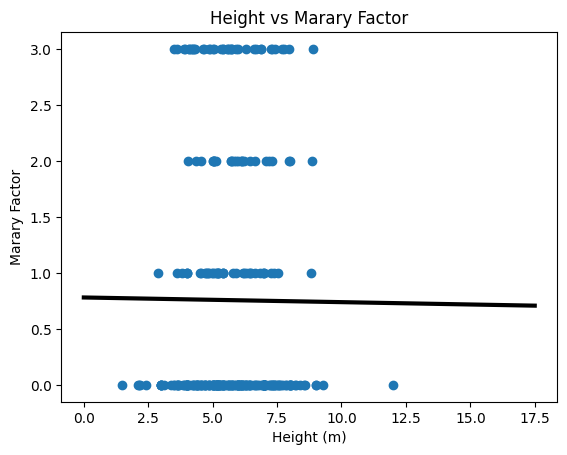

In [558]:
# Plot Height vs Marary Factor
plt.title(label="Height vs Marary Factor")
plt.xlabel(xlabel="Height (m)", fontdict=None, labelpad=None)
plt.ylabel(ylabel="Marary Factor", fontdict=None, labelpad=None)
plt.scatter(bab2["Height (m)"], bab2["Marary factor"])

# Linear Regression Line
m, b = np.polyfit(bab2["Height (m)"], bab2["Marary factor"], deg=1)
xseq = np.linspace(0, 17.5)
plt.plot(xseq, b + m * xseq, color="black", lw=3)

print("slope =", m)
print("y-intercept =", b)
print("r =", r)

In [624]:
statistics(bab2_circum, "Marary factor", "Baobab Circumference (m)")

,Marary factor,Average Baobab Circumference (m),Baobab Circumference (m) Standard Deviation,Counts
0,0.0,5.269630,2.979082,27
1,1.0,8.759630,1.998899,27
2,2.0,8.383333,2.871791,27
3,3.0,8.354815,2.561466,27


slope = 0.12444026986697941
y-intercept = -0.06865837234307119
r = 0.36094714170723696


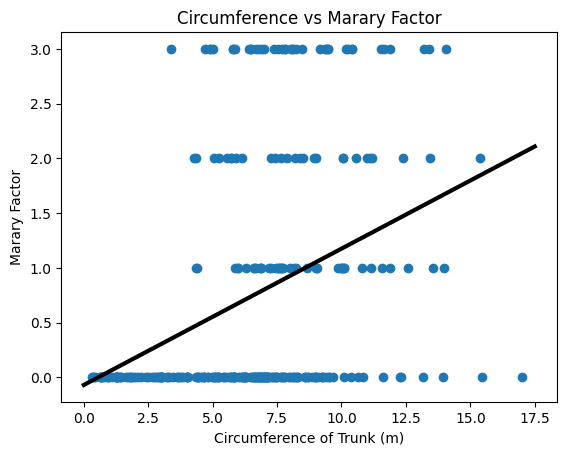

In [478]:
# Plot Circumference vs Marary Factor
plt.title(label="Circumference vs Marary Factor")
plt.xlabel(xlabel="Circumference of Trunk (m)", fontdict=None, labelpad=None)
plt.ylabel(ylabel="Marary Factor", fontdict=None, labelpad=None)
plt.scatter(bab2["Circumference of trunk (m)"], bab2["Marary factor"])

# Linear Regression Line
m1, b1 = np.polyfit(bab2["Circumference of trunk (m)"], bab2["Marary factor"], deg=1)
xseq = np.linspace(0, 17.5)
plt.plot(xseq, b1 + m1 * xseq, color='black', lw=3)

print("slope =", m1)
print("y-intercept =", b1)
print("r =", r1)

Height vs Marary: y = -0.004172700841822217x + 0.7807974100284034
Circumference vs Marary: y = 0.12444026986697941x - 0.06865837234307119


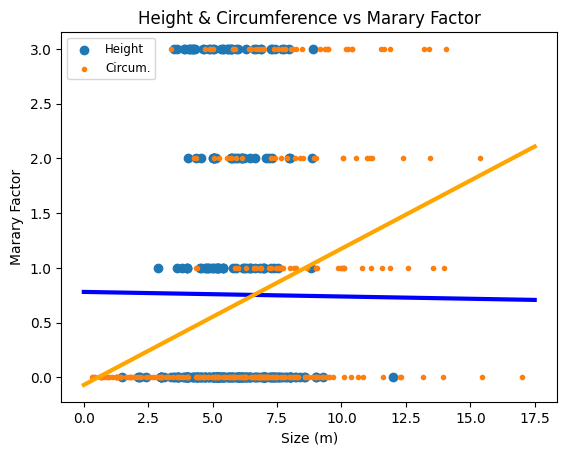

In [479]:
# Plot on same figure
plt.title(label="Height & Circumference vs Marary Factor")
plt.xlabel(xlabel="Size (m)", fontdict=None, labelpad=None)
plt.ylabel(ylabel="Marary Factor", fontdict=None, labelpad=None)

plt.scatter(bab2["Height (m)"], bab2["Marary factor"])
plt.scatter(bab2["Circumference of trunk (m)"], bab2["Marary factor"], marker=".")

plt.legend(["Height", "Circum."], ncol = 1 , loc = "upper left", bbox_to_anchor = (0, 1), fontsize="8.5")

# Linear Regression Line
plt.plot(xseq, b + m * xseq, color="blue", lw=3)
plt.plot(xseq, b1 + m1 * xseq, color="orange", lw=3)

print(f"Height vs Marary: y = {m}x + {b}")
print(f"Circumference vs Marary: y = {m1}x - {abs(b1)}")

### 3. Are there any surrounding vegetation species that make it more likely for a tree to have its bark stripped? Or is a tree with lots of bark stripped more likely to be near a surrounding vegetation species? This could hint at human usage patterns (if humans use the baobab bark and also use another plant species, they may prefer to travel to one area to collect multiple resources).

- tangenbave, nonotandrake, fandriandambo, tifafa, satsesatse, sangovihovy, hazifoty, ragidrantsa, plant that is same family as komokomoke, tsatsaboronjeo, tsianbarakoa, hazombave, vahamainty, olamboay, mandave, aloe, antsy, varonalika, vatolalake (small with thorns), vofota, vofotake, and mantsintay all have an average bark stripping factor of 3 (the highest), though the number of each found varies from 1-3, indicating doubt as to their association. 

- For vegetation species recorded at least 10 times, lisirere, kily, tifotifo, bolobolo, lisinjere, lombiry were the only species that displayed an average bark stripping factor of at least 1.5, suggesting that they may be more likely to have an association with bark stripping.

It is important to note that the number of each vegetation species sampled at each site varied greatly, ranging from 1-148, so proceed with caution. 

The chi-square p-value (0.3711) between surrounding vegetation species and bark stripping factor is greater than 0.05, suggesting that there is no significant association between the amount of bark stripping and the vegetation species surrounding each baobab. 

In [547]:
bab3 = bab.loc[:, ["Surrounding vegetation", "Bark stripping factor"]].dropna()
bab3['Surrounding vegetation'] = bab3['Surrounding vegetation'].str.split(', ')
bab3 = bab3.explode("Surrounding vegetation").groupby('Surrounding vegetation', as_index=False).sum()
print(f"Chi-Square p-value = {chi_square_independence(bab3, "Surrounding vegetation", "Bark stripping factor")}")

Chi-Square p-value = 0.37109594795098066


In [7]:
bab3 = bab.loc[:, ["Surrounding vegetation", "Marary factor"]].dropna()
bab3['Surrounding vegetation'] = bab3['Surrounding vegetation'].str.split(', ')
bab3 = bab3.explode("Surrounding vegetation").groupby('Surrounding vegetation', as_index=False).sum()
print(f"Chi-Square p-value = {chi_square_independence(bab3, "Surrounding vegetation", "Marary factor")}")

Chi-Square p-value = 0.38521030862473965


In [8]:
bab3 = bab.loc[:, ["Surrounding vegetation", "Marary factor"]].dropna()
bab3['Surrounding vegetation'] = bab3['Surrounding vegetation'].str.split(', ')
bab3 = bab3.explode("Surrounding vegetation").rename(columns={"Marary factor":"Marary Factor"})
bab3 = statistics(bab3, "Surrounding vegetation", "Marary Factor")
bab3.sort_values(by=['Counts'], ascending=False)

,Surrounding vegetation,Average Marary Factor,Marary Factor Standard Deviation,Counts
84,komokomoke,0.670886,1.024807,158
88,laro,0.657534,1.020063,146
150,sono,0.819549,1.140405,133
142,sasave,0.882353,1.119531,102
20,boy,0.893617,1.186556,94
145,sekatse,0.829545,1.186336,88
28,famata,1.063291,1.212560,79
75,katsafay,0.607143,1.090097,56
171,tsipapolahe,1.080000,1.084962,50
39,fatipatike,0.666667,1.098032,48


In [553]:
bab3 = bab.loc[:, ["Surrounding vegetation", "Bark stripping factor"]].dropna()
bab3['Surrounding vegetation'] = bab3['Surrounding vegetation'].str.split(', ')
bab3 = bab3.explode("Surrounding vegetation").rename(columns={"Bark stripping factor":"Bark Stripping Factor"})
bab3 = statistics(bab3, "Surrounding vegetation", "Bark Stripping Factor")
bab3.sort_values(by=['Counts'], ascending=False)

,Surrounding vegetation,Average Bark Stripping Factor,Bark Stripping Factor Standard Deviation,Counts
81,komokomoke,1.331081,1.127205,148
84,laro,1.282609,1.158839,138
146,sono,1.338710,1.160930,124
138,sasave,1.453608,1.127503,97
19,boy,1.372093,1.095945,86
141,sekatse,1.309524,1.192104,84
27,famata,1.337838,1.063427,74
73,katsafay,1.137255,1.216875,51
167,tsipapolahe,1.400000,1.142857,50
155,tapisaky,1.340909,1.077102,44


In [554]:
# Average Bark Stripping Per Fonkontany
bab3.plot.bar(x="Surrounding vegetation", y="Average Bark Stripping Factor", xlabel="Surrounding vegetation", ylabel="Bark Stripping Factor Average", title="Average Bark Stripping Per Surrounding Vegetation Species", figsize=(100, 100), fontsize=25, legend=False, width=.9, rot = 90).set_title("Average Bark Stripping Per Surrounding Vegetation Species", fontsize=100)
plt.xlabel('Surrounding vegetation', fontsize=100)
plt.xlabel('Surrounding vegetation', fontsize=100)
plt.ylabel('Average Bark Stripping Factor', fontsize=100)

Text(0, 0.5, 'Average Bark Stripping Factor')

### 4. Are areas with more or less bark stripping usually associated with larger trees?

- Areas with more bark stripping are typically associated with, on average, shorter baobabs with greater circumferences.
- Areas with less bark stripping are typically associated with, on average, taller baobabs with smaller circumferences. 

It is important to note that the number of baobabs sampled at each site varied greatly, ranging from 1-139, so proceed with caution. 

In [664]:
bab4 = bab.loc[:, ["Fokontany / PN", "Height (m)", "Circumference of trunk (m)"]].dropna()
bab4_height = bab.loc[:, ["Fokontany / PN", "Height (m)"]].dropna().sort_values(by=["Height (m)"], ascending=True).rename(columns={"Height (m)": "Baobab Height (m)"})
# bab4_height = bab4_height.groupby('Fokontany / PN', group_keys=False).sample(n=11).reset_index(drop=True)
bab4_circum = bab.loc[:, ["Fokontany / PN", "Circumference of trunk (m)"]].dropna().sort_values(by=["Circumference of trunk (m)"], ascending=True).rename(columns={"Circumference of trunk (m)": "Baobab Circumference (m)"})
# bab4_circum = bab4_circum.groupby('Fokontany / PN', group_keys=False).sample(n=11).reset_index(drop=True)

In [665]:
bab4_height = statistics(bab4_height, "Fokontany / PN", "Baobab Height (m)")
bab4_height

,Fokontany / PN,Average Baobab Height (m),Baobab Height (m) Standard Deviation,Counts
0,Ambalorao,5.546929,1.118309,140
1,Andavadoaka,5.480000,1.204815,11
2,Ankindranoke,6.663158,1.713535,76
3,Ankindranoke / Mikea Park,6.757857,2.240420,14
4,Antsatsamory,4.574200,0.945935,50
5,Belavenoke,4.700000,NaN,1


<Axes: title={'center': 'Average Baobab Height Per Fonkontany'}, xlabel='Fokontany / PN', ylabel='Average Baobab Height (m)'>

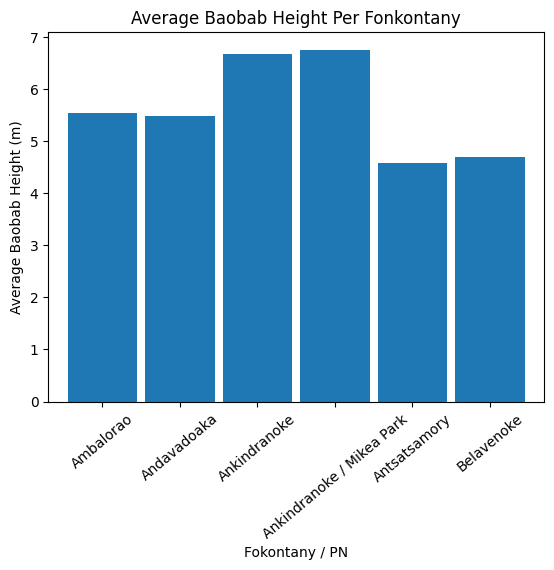

In [666]:
# Average Baobab Height Per Fonkontany
bab4_height.plot.bar(x="Fokontany / PN", y="Average Baobab Height (m)", xlabel="Fokontany / PN", ylabel="Average Baobab Height (m)", title="Average Baobab Height Per Fonkontany", legend=False, width=.9, rot = 40)

In [667]:
bab4_circum = statistics(bab4_circum, "Fokontany / PN", "Baobab Circumference (m)")
bab4_circum

,Fokontany / PN,Average Baobab Circumference (m),Baobab Circumference (m) Standard Deviation,Counts
0,Ambalorao,7.768298,2.832627,141
1,Andavadoaka,10.023636,3.415152,11
2,Ankindranoke,4.655263,3.228403,76
3,Ankindranoke / Mikea Park,5.214286,4.687219,14
4,Antsatsamory,6.743400,1.995619,50
5,Belavenoke,6.800000,NaN,1


<Axes: title={'center': 'Average Baobab Trunk Circumference Per Fonkontany'}, xlabel='Fokontany / PN', ylabel='Average Baobab Trunk Circumference (m)'>

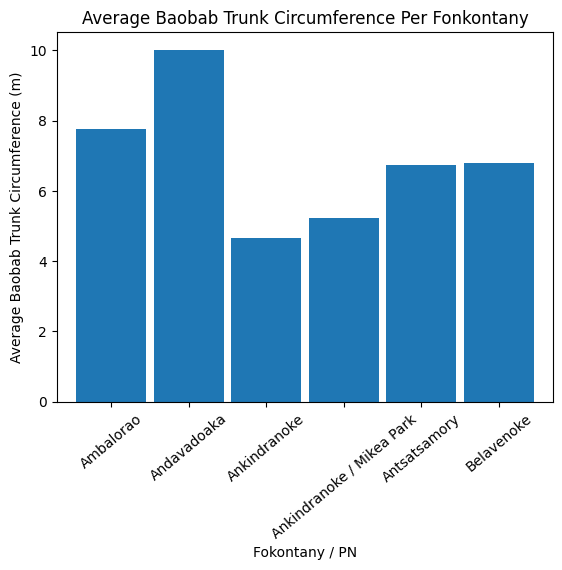

In [668]:
# Average Baobab Trunk Circumference Per Fonkontany
bab4_circum.plot.bar(x="Fokontany / PN", y="Average Baobab Circumference (m)", xlabel="Fokontany / PN", ylabel="Average Baobab Trunk Circumference (m)", title="Average Baobab Trunk Circumference Per Fonkontany", legend=False, width=.9, rot = 40)

## 5. Are there particular villages or areas where there is more bark stripping than other areas?

- Areas such as Andavadoaka, Ambalorao, and Antsatsamory all have on average a bark stripping factor greater than 1 while Akindranoke and Akindranoke/Mikea Park have on average a bark strippping factor of less than 1.
- Alhough Belavenoke has the highest average bark stripping factor, because only one tree was sampled in the area, it cannot be indicative of the true average in the area. 

It is important to note that the number of baobabs sampled at each site varied greatly, ranging from 1-131, so proceed with caution. 

The chi-square p-value (0.0004) between fokontany and bark stripping factor is less than 0.05, suggesting that there is a significant association between the amount of bark stripping and fonkontany. 

In [659]:
bab5 = bab.loc[:, ["Fokontany / PN", "Bark stripping factor"]].dropna()
print(f"Chi-Square p-value = {chi_square_independence(bab5, "Fokontany / PN", "Bark stripping factor")}")

Chi-Square p-value = 0.00036456738585911993


In [660]:
bab5 = statistics(bab5, "Fokontany / PN", "Bark stripping factor")
bab5

,Fokontany / PN,Average Bark stripping factor,Bark stripping factor Standard Deviation,Counts
0,Ambalorao,1.442748,1.089533,131
1,Andavadoaka,2.000000,0.866025,9
2,Ankindranoke,0.941176,1.170309,68
3,Ankindranoke / Mikea Park,0.357143,0.633324,14
4,Antsatsamory,1.437500,1.146804,48
5,Belavenoke,3.000000,NaN,1


<Axes: title={'center': 'Average Bark Stripping Per Fonkontany'}, xlabel='Fokontany / PN', ylabel='Average Bark Stripping Factor'>

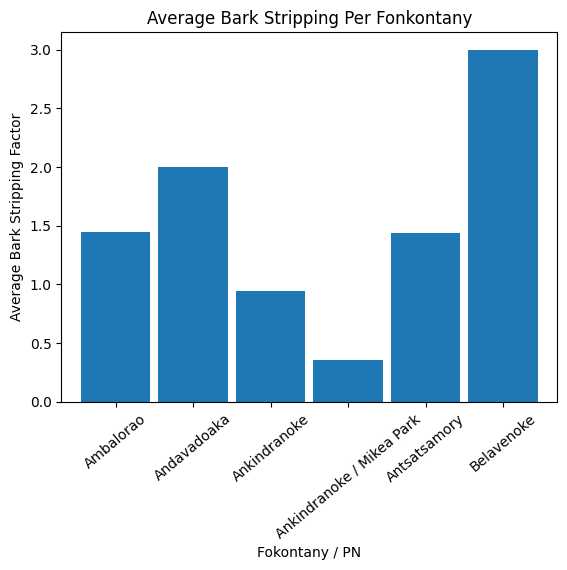

In [663]:
# Average Bark Stripping Per Fonkontany
bab5.plot.bar(x="Fokontany / PN", y="Average Bark stripping factor", xlabel="Fokontany / PN", ylabel="Average Bark Stripping Factor", title="Average Bark Stripping Per Fonkontany", legend=False, width=.9, rot = 40)

### 6. Are there particular villages or areas where there is more of the fungal pattern?

- On average, Andavadoaka, Ambalorao, and Antsatsamory all have greater amounts of the fungal pattern
- On average, Belavenoke, Akindranoke, and Akindranoke/Mikea Park all have little to none of the fungal pattern

It is important to note that the number of baobabs sampled at each site varied greatly, ranging from 1-141, so proceed with caution. 

The chi-square p-value (8.0868 x 10^-9) between fokontany and marary factor is less than 0.05, suggesting that there is a significant association between the amount of bark pattern and fokontany. 

In [650]:
bab6 = bab.loc[:, ["Fokontany / PN", "Marary factor"]].dropna()
print(f"Chi-Square p-value = {chi_square_independence(bab6, "Fokontany / PN", "Marary factor")}")

Chi-Square p-value = 8.086794112845348e-09


In [656]:
bab6 = statistics(bab6, "Fokontany / PN", "Marary factor")
bab6

,Fokontany / PN,Average Marary factor,Marary factor Standard Deviation,Counts
0,Ambalorao,0.900709,1.123165,141
1,Andavadoaka,1.545455,0.934199,11
2,Ankindranoke,0.243243,0.736724,74
3,Ankindranoke / Mikea Park,0.000000,0.000000,13
4,Antsatsamory,1.240000,1.286666,50
5,Belavenoke,0.000000,NaN,1


<Axes: title={'center': 'Average Fungal Pattern Per Fonkontany'}, xlabel='Fokontany / PN', ylabel='Average Marary Factor'>

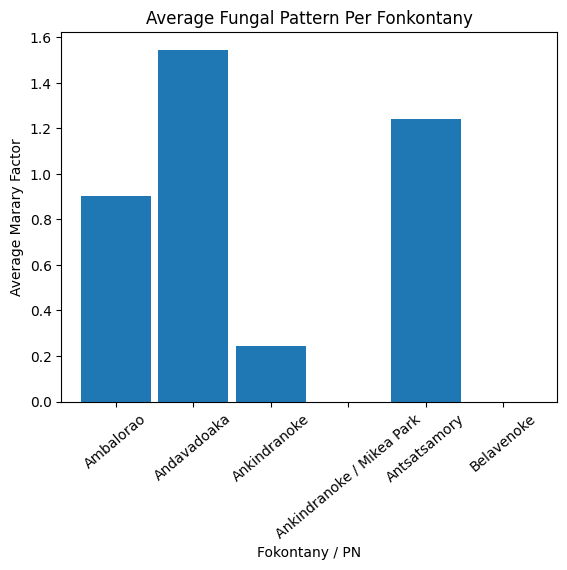

In [657]:
# Average Fungal Pattern Per Fonkontany
bab6.plot.bar(x="Fokontany / PN", y="Average Marary factor", xlabel="Fokontany / PN", ylabel="Average Marary Factor", title="Average Fungal Pattern Per Fonkontany", legend=False, width=.9, rot = 40)

### 7. Is there relationship between the type of soil a baobab is in and the marary pattern?

The chi-square p-value (≈0.000263) between the type of soil and marary factor is less than 0.05, indicating that there is a significant association between the amount of bark pattern and soil type. 

Baobabs in purely sand or sandy soil also on average exhibit less of the marary pattern, suggesting that baobabs in sandy type soils may be less likely to contract the marary pattern associated with the fungal infection. 

It is important to note that the number of baobabs sampled with each soil type varied greatly, ranging from 7-100, so proceed with caution. 

In [492]:
def soil_type(df, label, type1, type2 = None, type3 = None):
    ind = df['Soil'].str.contains(type1)

    if type2 is not None:
        ind &= df['Soil'].str.contains(type2)
    if type3 is not None:
        ind &= df['Soil'].str.contains(type3)
    
    df.loc[ind, "Soil Type"] = label

In [670]:
bab7 = bab.loc[:, ["Soil", "Marary factor"]].dropna() 
bab7.insert(0, 'Soil Type', None)
soil_type(bab7, 'Rock', 'rock|stone')
soil_type(bab7, 'Sand', 'sand')
soil_type(bab7, 'Rock/Dirt', 'rock|stone', 'dirt')
soil_type(bab7, 'Rock/Sand', 'rock|stone', 'sand')
soil_type(bab7, 'Rock/Sand/Dirt', 'rock|stone', 'sand', 'dirt')
soil_type(bab7, 'Sandy Soil', 'sandy soil')
bab7 = bab7.drop(columns=['Soil'], axis=1)
print(f"Chi-Square p-value = {chi_square_independence(bab7, "Soil Type", "Marary factor")}")
statistics(bab7, "Soil Type", "Marary factor")

Chi-Square p-value = 0.00026300703864236226


,Soil Type,Average Marary factor,Marary factor Standard Deviation,Counts
0,Rock,0.980000,1.230751,100
1,Rock/Dirt,0.928571,1.141139,14
2,Rock/Sand,1.031746,1.217722,63
3,Rock/Sand/Dirt,1.285714,0.755929,7
4,Sand,0.217391,0.599736,23
5,Sandy Soil,0.409639,0.826927,83


In [674]:
bab7 = bab.loc[:, ["Soil", "Marary factor"]].dropna() 
bab7 = statistics(bab7, "Soil", "Marary factor")
bab7.sort_values(by=['Average Marary factor'], ascending=False)

,Soil,Average Marary factor,Marary factor Standard Deviation,Counts
25,"sandy, some small rocks (limestone), fewer rocks than BF, fossiliferous limestone (shells)",3.000000,NaN,1
7,rocks (limestone) around base of trunk,3.000000,NaN,1
14,"rocky, sandy",2.000000,1.154701,4
11,rocky (rockier than Andava),2.000000,NaN,1
9,rocky (large chunks of limestone),1.421053,1.304513,19
10,"rocky (limestone, quartz), dirt, fine sand",1.285714,0.755929,7
1,large chunks of limestone at base,1.250000,1.500000,4
24,"sandy, some small rocks (limestone), fewer rocks than BF",1.157895,1.197437,38
26,very rocky (ground is pure limestone),1.129032,1.284314,31
0,"dirt, some limestone rock (much less than in AMB)",1.000000,1.322876,9


### 8. Is there a relationship between the species of baobab and the marary pattern?

Though only 2 species of baobab were sampled, there was not a single sample of rubrostipa that displayed the marary pattern. This could suggest that rubrostipa baobabs are less likely to be infected by the marary fungal infection (considering there were many fewer samples taken compared to grandidieri) or immune. It could also merely suggest that they don't show the same symptoms (i.e. marary pattern on bark) but can still be infected. Further research is required to uncover the truth behind this disparity. 

It is important to note that only 17 samples of rubrostipa were taken compared to 305-308 of grandidieri, so proceed with caution in interpreting the results.

In [675]:
bab8 = bab.loc[:, ["Species", "Marary factor"]]
bab8 = bab8[bab8['Species'] != 'grandidieri?']
statistics(bab8, 'Species', 'Marary factor') 

,Species,Average Marary factor,Marary factor Standard Deviation,Counts
0,grandidieri,0.823529,1.125894,305
1,rubrostipa,0.000000,0.000000,17


### 9. Is there a relationship between the altitude of the baobab and the marary pattern?

- A correlation coefficient of approximately -0.2355 indicates a weak negative correlation between the altitude of baobabs and the amount of bark pattern.
- Based on the table when taking random samples of 26 per marary factor, on average, baobabs with a marary factor of 0 tend to have the greatest altitude, baobabs with a marary factor of 2 have an altitude of 5, and baobabs with a marary factor of 1 and 3 have roughly equal altitudes.

It is important to note that there were many more occurrences of baobabs without the marary pattern than with, so proceed with caution.

In [560]:
bab9 = bab.loc[:, ["Altitude (m)", "Marary factor"]].dropna().sort_values(by=["Altitude (m)"], ascending=True)
bab9_sampled = bab9.groupby('Marary factor', group_keys=False).sample(n=26).reset_index(drop=True)

r = bab['Altitude (m)'].corr(bab['Marary factor'])

In [561]:
statistics(bab9_sampled, 'Marary factor', 'Altitude (m)')

,Marary factor,Average Altitude (m),Altitude (m) Standard Deviation,Counts
0,0.0,7.269231,7.389494,26
1,1.0,4.807692,4.354485,26
2,2.0,5.000000,4.613025,26
3,3.0,3.653846,5.556562,26


slope = -0.03894860308630961
y-intercept = 1.0026466717747564
r = -0.2355060772671884


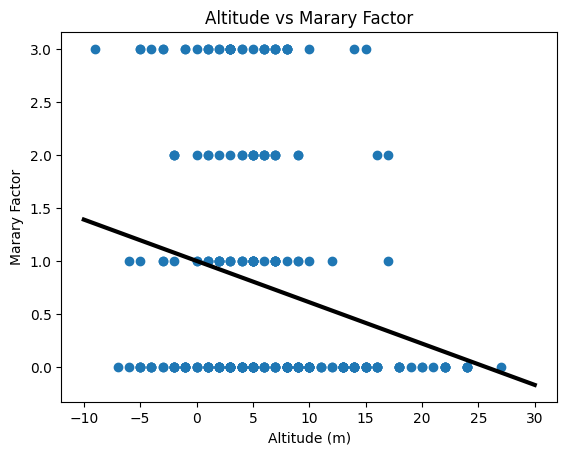

In [563]:
# Plot Altitude vs Marary Factor
plt.title(label="Altitude vs Marary Factor")
plt.xlabel(xlabel="Altitude (m)", fontdict=None, labelpad=None)
plt.ylabel(ylabel="Marary Factor", fontdict=None, labelpad=None)
plt.scatter(bab9["Altitude (m)"], bab9["Marary factor"])

# Linear Regression Line
m, b = np.polyfit(bab9["Altitude (m)"], bab9["Marary factor"], deg=1)
xseq = np.linspace(-10, 30)
plt.plot(xseq, b + m * xseq, color="black", lw=3)

print("slope =", m)
print("y-intercept =", b)
print("r =", r)

### 10. Is there a relationship between human interactions and the marary pattern?

- A correlation coefficient of approximately 0.1732 (when Y? = Y) indicates a very weak positive correlation between the amount of human interactions and the amount of bark pattern.
- A correlation coefficient of approximately 0.1657 (when Y? = N) indicates a very weak positive correlation between the amount of human interactions and the amount of bark pattern.
- The chi-square p-value (0.0815) between human interaction score and marary factor (when Y? = Y) is greater than 0.05, suggesting that there is no significant association between the amount of human interactions and amount of bark pattern.
- The chi-square p-value (0.0532) between human interaction score and marary factor (when Y? = N) is greater than 0.05, suggesting that there is no significant association between the amount of human interactions and amount of bark pattern.

Regardless of the sensitivity test, the chi-square p-value between the human interaction score and marary factor is greater than 0.05, suggesting that there is no significant association between the human interactions and the bark pattern. 

It is important to note that the number of occurences of each Human interaction score differed greatly in many cases, so proceed with caution. 

Note: All "NaN" values under "Bark etchings" and "Footholds" were assumed to be "Y" and all rows containing "NaN" under "Marary factor" and "Bark stripping (Y/N)" were removed

In [496]:
def human_vs_marary(sensitivity_test):
    bab10 = bab.loc[:, ["Bark stripping (Y/N)", "Bark etchings", "Footholds", "Marary factor"]].dropna(subset=['Marary factor', 'Bark stripping (Y/N)']).replace({np.nan:'Y','Y?':sensitivity_test}).sort_values(by=["Marary factor"], ascending=True)
    bab10['Human Interaction Score'] = bab10[['Bark stripping (Y/N)', 'Bark etchings', 'Footholds']].eq('Y').sum(axis=1)
    r = bab10['Human Interaction Score'].corr(bab10['Marary factor'])
    chi_square_pvalue = chi_square_independence(bab10, "Human Interaction Score", "Marary factor")

    counts = bab10.groupby(bab10.columns.tolist(), as_index=False).size()
    counts = counts.rename(columns={"size":"Count"}).sort_values(by=["Count"], ascending=False)
    
    # Plot Human Interaction vs Marary Factor 
    plt.scatter(bab10["Human Interaction Score"], bab10["Marary factor"], s=60, alpha=0.7)
    plt.title(label="Human Interaction vs Marary Factor")
    plt.xlabel(xlabel="Human Interaction Score")
    plt.ylabel(ylabel="Marary Factor")
    
    # Fit linear regression via least squares with numpy.polyfit
    m, b = np.polyfit(bab10["Human Interaction Score"], bab10["Marary factor"], deg=1)
    xseq = np.linspace(0, 3)
    plt.plot(xseq, b + m * xseq, color="k", lw=2.5)
    
    print(f"Chi-Square p-value = {chi_square_pvalue}")
    print(f"r = {r}")
    plt.show()
    display(counts)

Chi-Square p-value = 0.08147042573436325
r = 0.17316845349749113


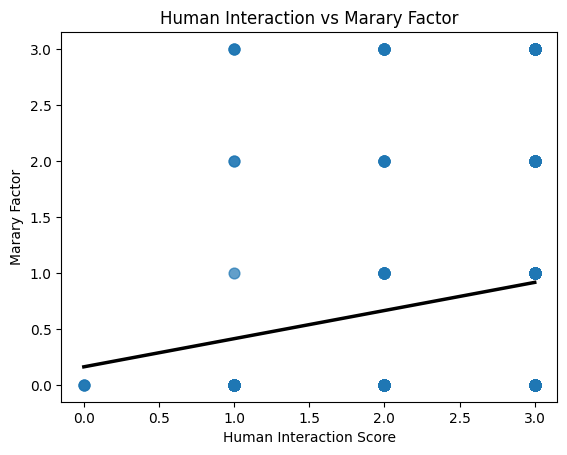

,Bark stripping (Y/N),Bark etchings,Footholds,Marary factor,Human Interaction Score,Count
14,Y,Y,Y,0.0,3,91
15,Y,Y,Y,1.0,3,32
1,N,Y,N,0.0,1,30
17,Y,Y,Y,3.0,3,27
5,N,Y,Y,0.0,2,27
16,Y,Y,Y,2.0,3,20
11,Y,Y,N,0.0,2,17
8,N,Y,Y,3.0,2,8
6,N,Y,Y,1.0,2,7
7,N,Y,Y,2.0,2,6


In [497]:
human_vs_marary('Y')

Chi-Square p-value = 0.053174938495070205
r = 0.16567283128850993


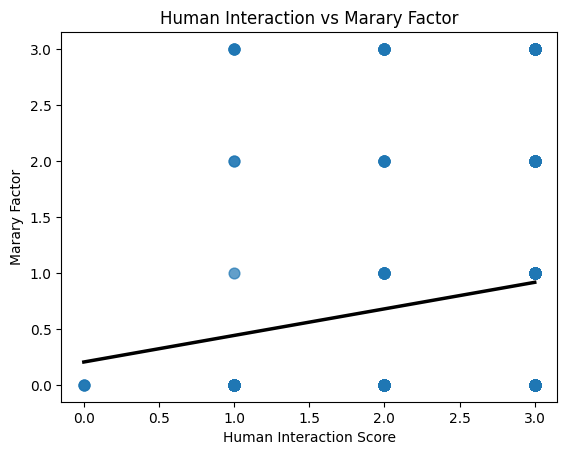

,Bark stripping (Y/N),Bark etchings,Footholds,Marary factor,Human Interaction Score,Count
14,Y,Y,Y,0.0,3,86
15,Y,Y,Y,1.0,3,32
5,N,Y,Y,0.0,2,32
1,N,Y,N,0.0,1,32
17,Y,Y,Y,3.0,3,25
16,Y,Y,Y,2.0,3,20
11,Y,Y,N,0.0,2,15
8,N,Y,Y,3.0,2,10
6,N,Y,Y,1.0,2,7
7,N,Y,Y,2.0,2,6


In [498]:
human_vs_marary('N')

In [678]:
counts = bab10.groupby(bab10.columns.tolist(), as_index=False).size()
counts = counts.rename(columns={"size":"Count"}).sort_values(by=["Count"], ascending=False)
counts